C:\Users\andyb\AppData\Local\Temp\ipykernel_27092\74860804.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


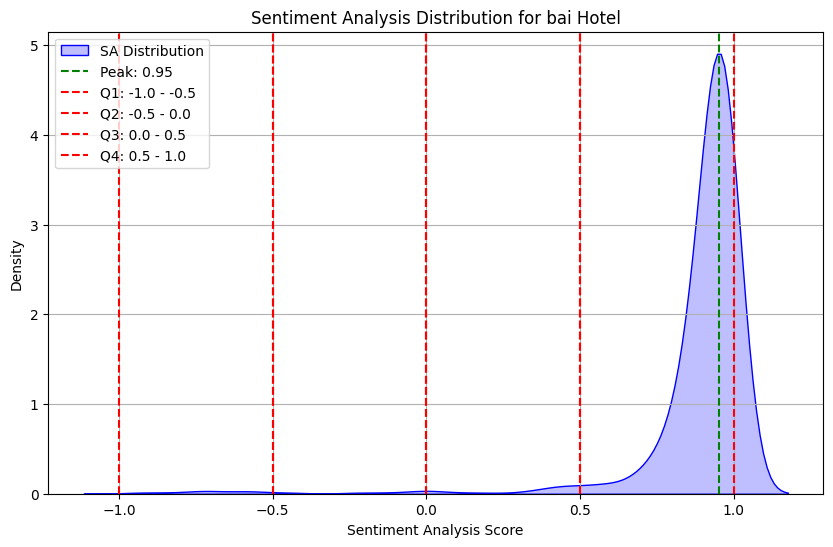

C:\Users\andyb\AppData\Local\Temp\ipykernel_27092\74860804.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


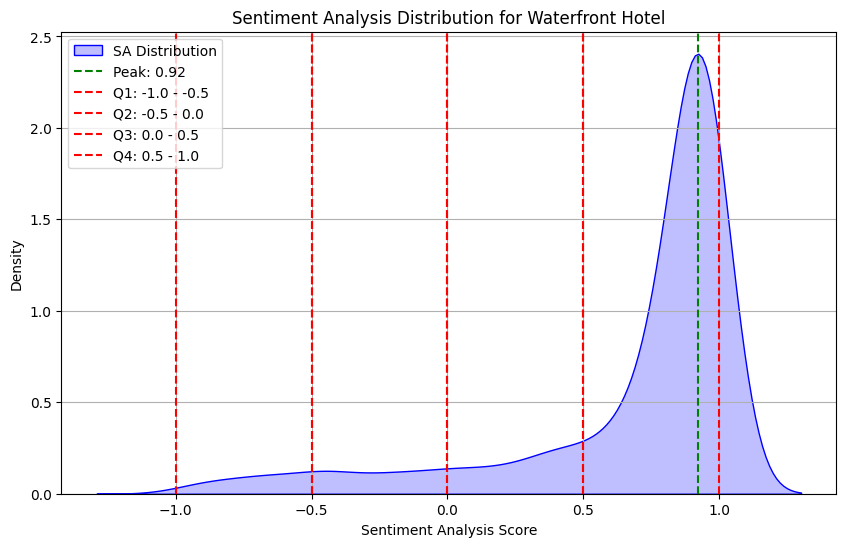

In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

waterfront_reviews = pd.read_csv(r'processed reviews\Waterfront_Hotel_and_Casino_processed.csv')
bai_reviews = pd.read_csv(r'processed reviews\bai_Hotel_processed.csv')

# Define a function to plot KDE and peak
def plot_sa_distribution(df, hotel_name):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')
    plt.title(f'Sentiment Analysis Distribution for {hotel_name}')
    plt.xlabel('Sentiment Analysis Score')
    plt.ylabel('Density')

    # Calculate KDE and find peak
    kde = gaussian_kde(df['SA'])
    density_values = kde(df['SA'])
    peak_value = df['SA'][density_values.argmax()]
    plt.axvline(x=peak_value, linestyle='--', color='green', label=f'Peak: {round(peak_value, 2)}')

    # Add quartile lines
    quartile_ranges = {'Q1': (-1.0, -0.5), 'Q2': (-0.5, 0.0), 'Q3': (0.0, 0.5), 'Q4': (0.5, 1.0)}
    for label, (start, end) in quartile_ranges.items():
        plt.axvline(x=start, linestyle='--', color='red', label=f'{label}: {start} - {end}')
        plt.axvline(x=end, linestyle='--', color='red')

    plt.legend()
    plt.grid(True)
    plt.show()

    return peak_value

def save_results(hotel_name, peak_value):
    output_folder = "statistical model results"
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Create a file path for saving the results
    output_filename = os.path.join(output_folder, f"{hotel_name}_results.txt")

    # Determine which quartile the peak belongs to
    quartile_ranges = {'Q1': (-1.0, -0.5), 'Q2': (-0.5, 0.0), 'Q3': (0.0, 0.5), 'Q4': (0.5, 1.0)}
    peak_quartile = None
    for label, (start, end) in quartile_ranges.items():
        if start <= peak_value <= end:
            peak_quartile = label
            break

    # Open the file in write mode and save the results
    with open(output_filename, "w") as file:
        file.write(f"{hotel_name} Peak Value: {peak_value}\n")
        file.write(f"{hotel_name} Peak Quartile Classification: {peak_quartile}\n")

# Plot KDE and peak for bai Hotel & Waterfront 
bai_peak_value = plot_sa_distribution(bai_reviews, 'bai Hotel')
waterfront_peak_value = plot_sa_distribution(waterfront_reviews, 'Waterfront Hotel')

# Save the results
save_results("bai Hotel", bai_peak_value)
save_results("Waterfront Hotel", waterfront_peak_value)

   Rating                                        Review Text      SA  \
0       5  happy recently concluded graduation event wate...  0.9735   
1       4  always book hotel hotel staff friendly always ...  0.9042   
2       5  stayed 5 nights waterfront hotel business trip...  0.9153   
3       3  hotel aok breakfast pool familys primary reaso...  0.4404   
4       3  attended event held hotel decided overnight st... -0.9022   

  Sentiment  Normalized_Rating  Composite_Score Quartile  
0  Positive                1.0          0.98675       Q4  
1  Positive                0.5          0.70210       Q2  
2  Positive                1.0          0.95765       Q4  
3  Positive                0.0          0.22020       Q1  
4  Negative                0.0         -0.45110       Q1  


C:\Users\andyb\AppData\Local\Temp\ipykernel_14660\1683265814.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Rating'], kde=True, ax=axs[0, 0], bins=5, palette="tab10")
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\andyb\AppData\Local\Temp\ipykernel_14660\1683265814.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Normalized_Rating'], kde=True, ax=axs[0, 1], bins=5, palette="tab10")
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  wit

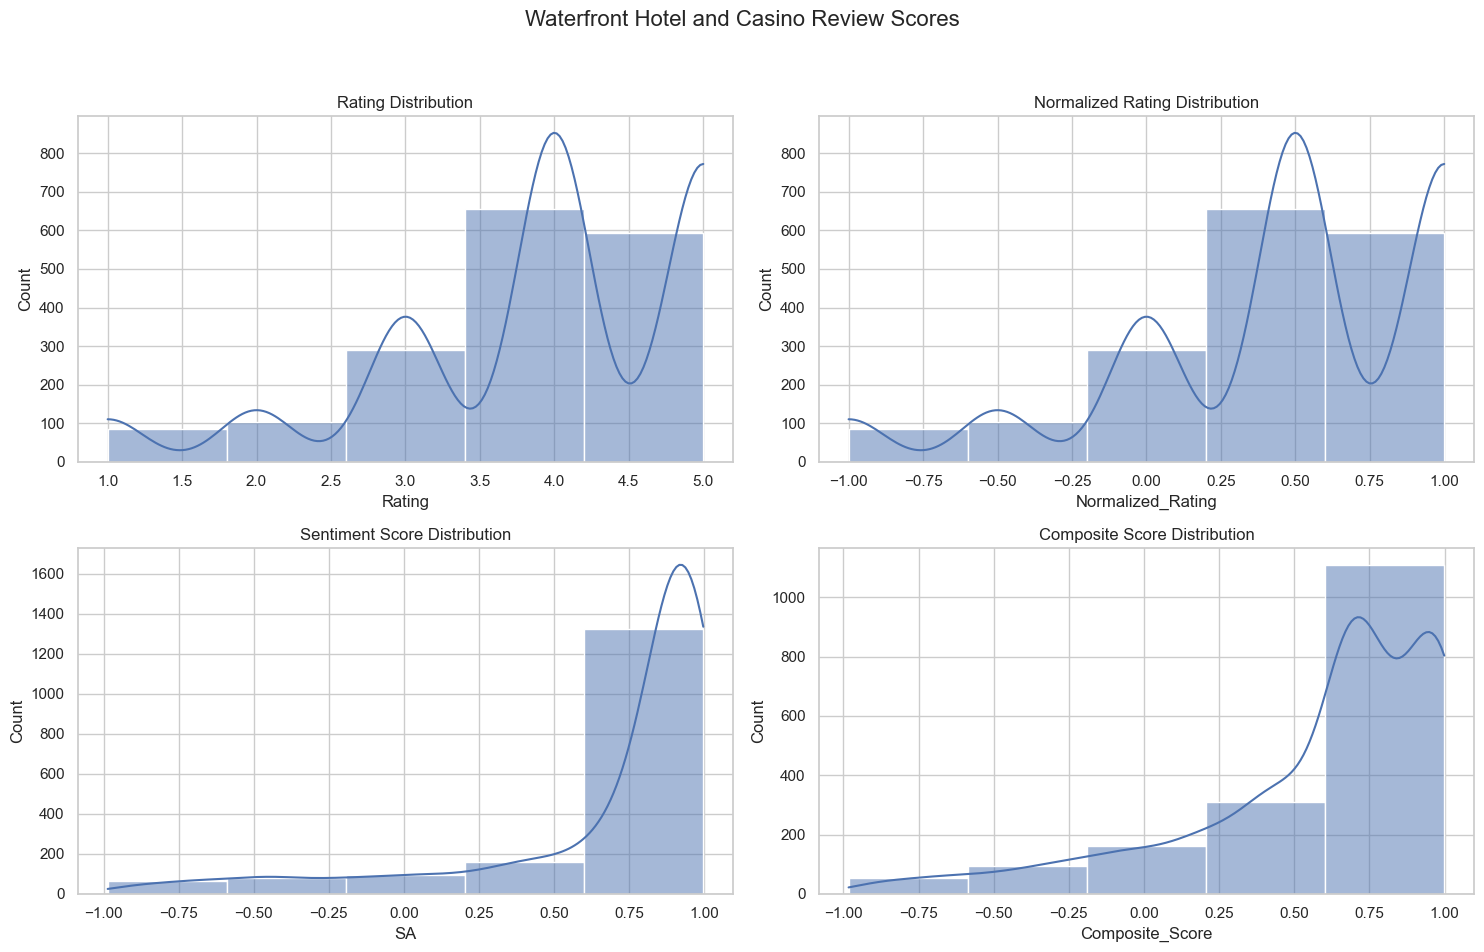

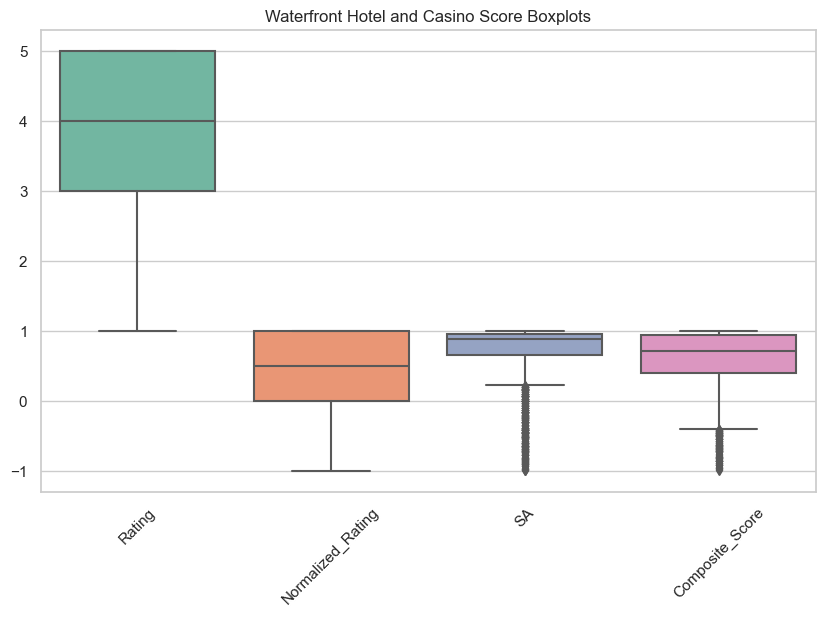

Processed data saved to: statistical model\scores\Waterfront_Hotel_and_Casino_processed.csv


   Rating                                        Review Text      SA  \
0       5  hotel restaurants excellent especially staff e...  0.9737   
1       5  steakhouse marbel grain unreal geo waiter bril...  0.9607   
2       5  beautiful hotel incredible staff rooms way bey...  0.9753   
3       5  dine meet guy mr michael laspinas accomodating...  0.5984   
4       5  nice accommodation great hotel responsive bell...  0.9493   

  Sentiment  Normalized_Rating  Composite_Score Quartile  
0  Positive                1.0          0.98685       Q4  
1  Positive                1.0          0.98035       Q3  
2  Positive                1.0          0.98765       Q4  
3  Positive                1.0          0.79920       Q1  
4  Positive                1.0          0.97465       Q3  


C:\Users\andyb\AppData\Local\Temp\ipykernel_14660\1683265814.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Rating'], kde=True, ax=axs[0, 0], bins=5, palette="tab10")
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\andyb\AppData\Local\Temp\ipykernel_14660\1683265814.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Normalized_Rating'], kde=True, ax=axs[0, 1], bins=5, palette="tab10")
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  wit

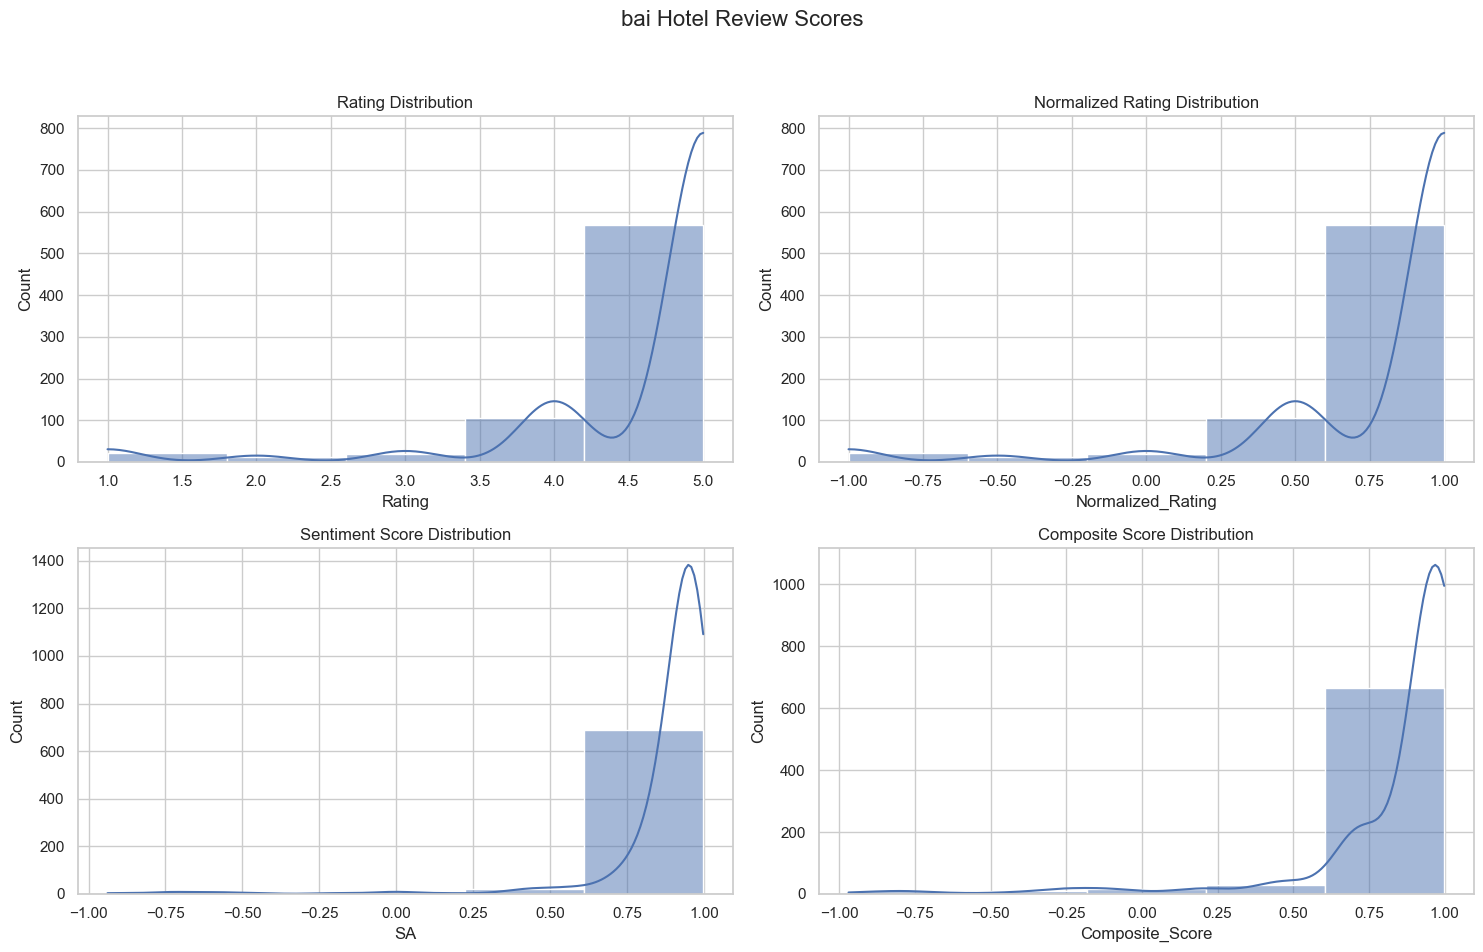

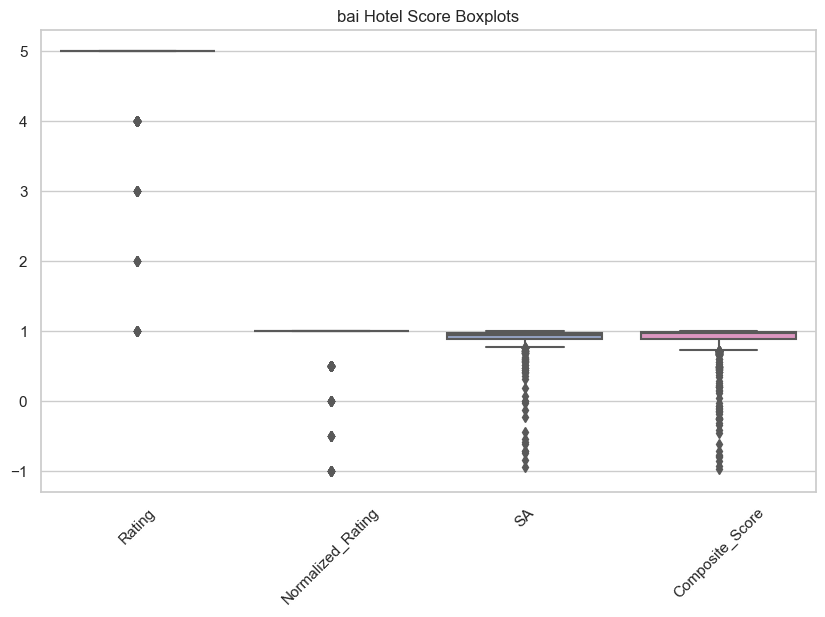

Processed data saved to: statistical model\scores\bai_Hotel_processed.csv




In [10]:
# # --- OLD VERSION ---

# import os
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Setting the style
# sns.set(style="whitegrid")

# # Function to create visualizations for each hotel
# def visualize_data(df):
#     fig, axs = plt.subplots(2, 2, figsize=(15, 10))
#     fig.suptitle(df.name + ' Review Scores', fontsize=16)

#     # Histogram of Ratings
#     sns.histplot(df['Rating'], kde=True, ax=axs[0, 0], bins=5, palette="tab10")
#     axs[0, 0].set_title('Rating Distribution')

#     # Histogram of Normalized Ratings
#     sns.histplot(df['Normalized_Rating'], kde=True, ax=axs[0, 1], bins=5, palette="tab10")
#     axs[0, 1].set_title('Normalized Rating Distribution')

#     # Histogram of Sentiment Analysis Scores
#     sns.histplot(df['SA'], kde=True, ax=axs[1, 0], bins=5, palette="tab10")
#     axs[1, 0].set_title('Sentiment Score Distribution')

#     # Histogram of Composite Scores
#     sns.histplot(df['Composite_Score'], kde=True, ax=axs[1, 1], bins=5, palette="tab10")
#     axs[1, 1].set_title('Composite Score Distribution')

#     # Adjusting layout
#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#     # Show the plots
#     plt.show()

#     # Boxplot for a clearer view on the quartiles and outliers
#     fig, ax = plt.subplots(figsize=(10, 6))
#     sns.boxplot(data=df[['Rating', 'Normalized_Rating', 'SA', 'Composite_Score']], palette="Set2")
#     ax.set_title(df.name + ' Score Boxplots')
#     plt.xticks(rotation=45)
#     plt.show()

# # Load data
# waterfront_reviews = pd.read_csv(r'processed reviews\Waterfront_Hotel_and_Casino_processed.csv')
# bai_reviews = pd.read_csv(r'processed reviews\bai_Hotel_processed.csv')

# waterfront_reviews.name = 'Waterfront Hotel and Casino'
# bai_reviews.name = 'bai Hotel'

# hotels = [waterfront_reviews, bai_reviews]

# for df in hotels:
#     # Convert 'Rating' to numeric
#     df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

#     # Normalize ratings to be between -1 and 1
#     df['Normalized_Rating'] = df['Rating'].apply(lambda x: (x - 3) / 2)

#     # Calculate composite score as the average of normalized rating and sentiment analysis score
#     df['Composite_Score'] = (df['Normalized_Rating'] + df['SA']) / 2

#     # Divide composite scores into quartiles
#     df['Quartile'] = pd.qcut(df['Composite_Score'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

#     # Display the first few rows to verify
#     print(df.head())
#     visualize_data(df)

#     # Save processed data
#     output_folder = r'statistical model\scores'
#     if not os.path.exists(output_folder):
#         os.makedirs(output_folder)
#     output_filename = os.path.join(output_folder, df.name.replace(' ', '_') + '_processed.csv')
#     df.to_csv(output_filename, index=False)
#     print("Processed data saved to:", output_filename)
#     print('\n')